### Model Deployment and Evaluation

Deploying the optimized model. saved the best-performing model and then loaded it to assess its accuracy on the test set. This evaluation was crucial to confirm that the model was robust and performed well on unseen data.
Please note that steps from notebook 3 & 4 was repeated here as I have some compatibility issues with my MAC. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  10000 non-null  int64 
 1   text    10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
None
             rating
count  10000.000000
mean       4.015800
std        1.346006
min        1.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000


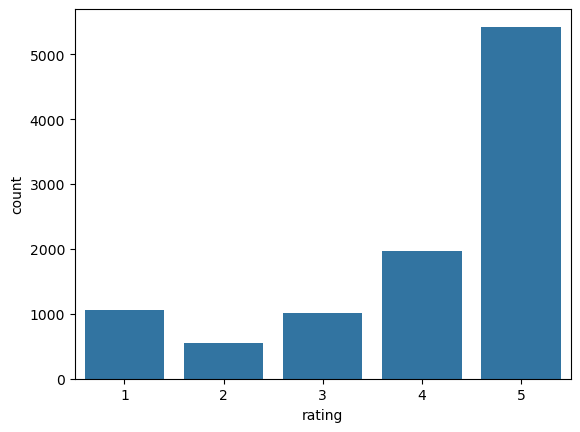

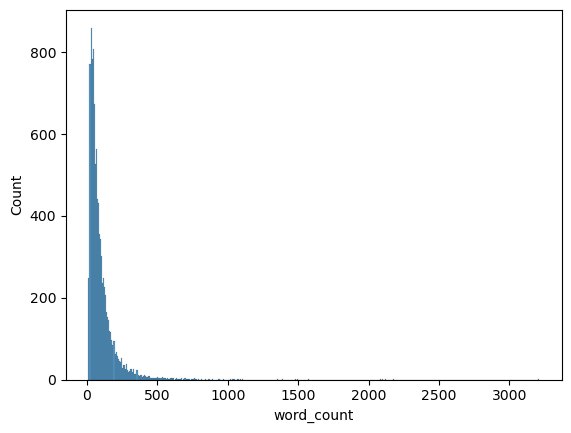

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=1000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=3000; total time=   0.4s
[CV] END ...............................C=0.1, max_iter=5000; total time=   0.4s
[CV] END .................................C=1, max_iter=3000; total time=   0.7s
[CV] END .................................C=1, max_iter=1000; total time=   0.8s
[CV] END .................................C=1, m

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

reviews_df = pd.read_csv('/Users/adese/Downloads/Singapore_Airlines_Reviews New.csv')
df = reviews_df

# Basic info about the dataset
print(df.info())
print(df.describe())

# Distribution of ratings
sns.countplot(x='rating', data=df)
plt.show()

# Word count distribution in the reviews
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(x='word_count', data=df)
plt.show()

# Data Pre-processing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[\t\n\r]+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['rating'], test_size=0.2, random_state=42)

# Vectorizing text
vectorizer = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Pre-Trained Model
from sklearn.linear_model import LogisticRegression

# Training a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Optimization and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [1000, 3000, 5000]}

# Instantiating the grid search model
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_vec, y_train)
print(f"Best parameters: {grid_search.best_params_}")

# Deployment
import joblib

# Saving the model 
filename = 'finalized_model.sav'
joblib.dump(grid_search.best_estimator_, filename)

# Loading the model for deployment
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test_vec, y_test)
print(result)
